In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline


In [22]:
train_df = pd.read_csv('train.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train_df.isnull().sum()

train_df_cleaned = train_df.drop(columns=['Cabin'])

train_df_cleaned['Age'] = train_df_cleaned['Age'].fillna(train_df_cleaned['Age'].median())

train_df_cleaned['Embarked'] = train_df_cleaned['Embarked'].fillna(train_df_cleaned['Embarked'].mode()[0])

train_df_cleaned = train_df_cleaned.drop(columns=['PassengerId', 'Name', 'Ticket'])

train_df_cleaned.isnull().sum()
train_df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


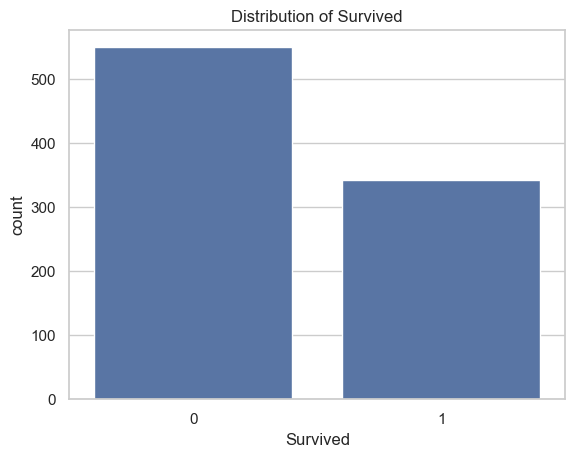

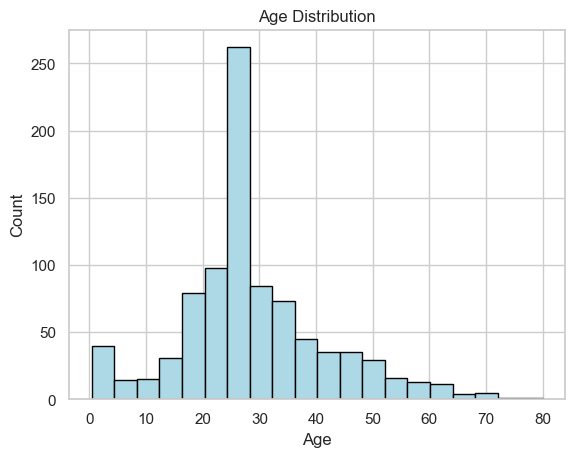

In [24]:
sns.countplot(x='Survived', data=train_df_cleaned)
plt.title('Distribution of Survived')
plt.show()

plt.hist(train_df_cleaned['Age'], bins=20, color='lightblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


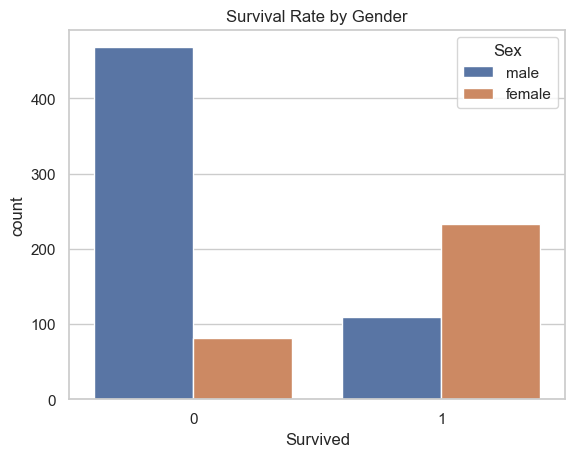

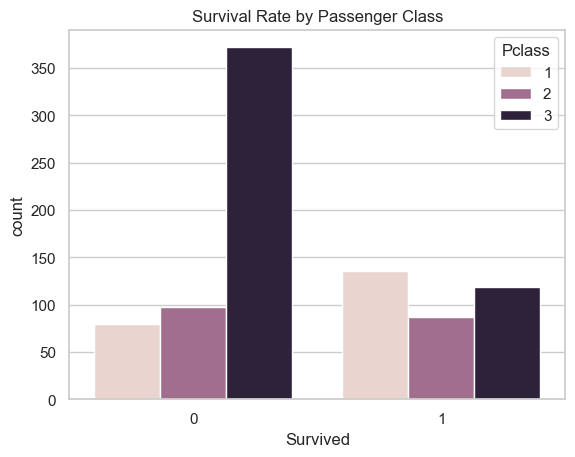

In [25]:
sns.countplot(x='Survived', hue='Sex', data=train_df_cleaned)
plt.title('Survival Rate by Gender')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=train_df_cleaned)
plt.title('Survival Rate by Passenger Class')
plt.show()


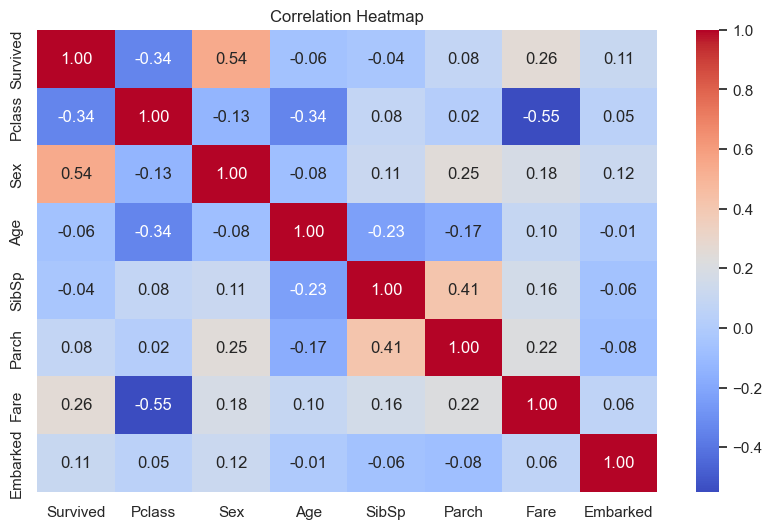

In [26]:
train_df_cleaned['Sex'] = train_df_cleaned['Sex'].map({'male': 0, 'female': 1})
train_df_cleaned['Embarked'] = train_df_cleaned['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
plt.figure(figsize=(10, 6))
sns.heatmap(train_df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
